<a href="https://colab.research.google.com/github/sefat22/Micro-Credential-22/blob/main/In_class_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Identify the problem 



###In this notebook, I will conduct an analysis to the given dataset to classify the class of iris based on sepal length, sepal width, petal length, and petal width.




#Task 2: Load the libraries 

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


#Task 3: Load the data

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sefat22/Micro-Credential-22/main/iris.csv')

#Task 4: EDA (Exploratory Data Analysis)

In [4]:
dataset.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
dataset.isnull()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [6]:
dataset.isnull().value_counts()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
False         False        False         False        False    150
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
dataset.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

#Task 5: Data Visualization

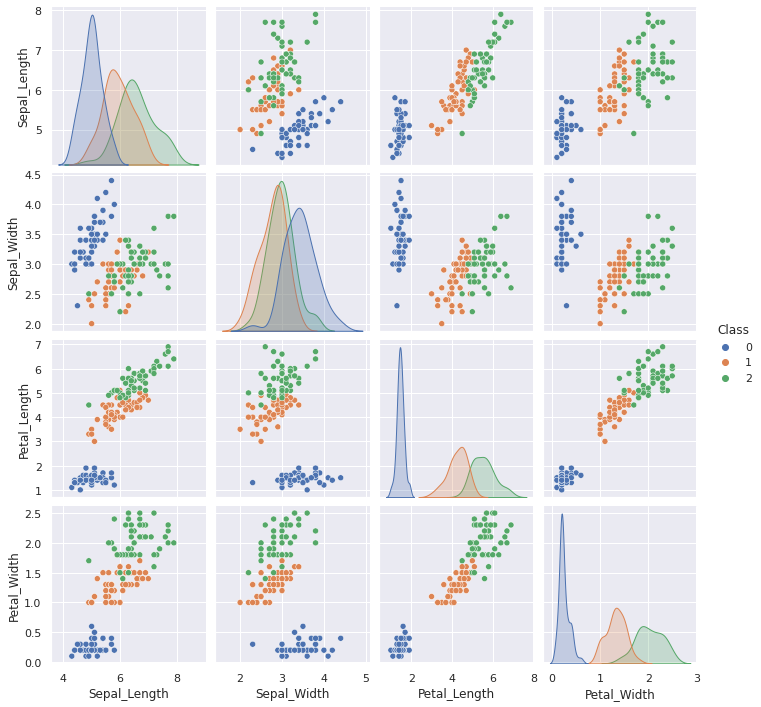

In [87]:

sns.pairplot(dataset, hue = 'Class')



#####The pairplot below visualizes the dataset finding the relationship between the variables. Both in x-axis and y-axis, there are four variables and all of these variables relation is shared in pairplot 
##### petal length and width of sertose is lower compared to versicolor and virginica. 
##### In order of length and width the order of highest to lowest is: Virginica, Versicolor, Sertose. 



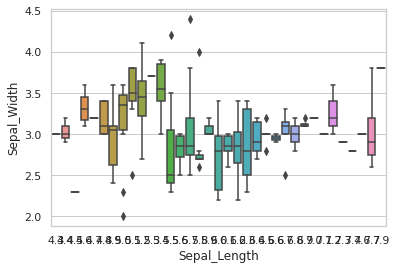

In [22]:
sns.boxplot(x="Sepal_Length", y="Sepal_Width",data= dataset)


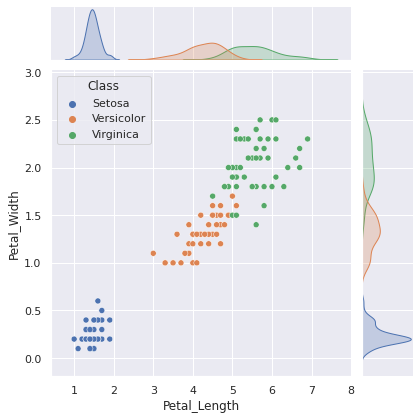

In [39]:
sns.jointplot(data=dataset, x="Petal_Length", y="Petal_Width", hue="Class")


####Setosa species have the smallest petal length as well as petal width
####Versicolor species have average petal length and petal width
####Virginica species have the highest petal length as well as petal width

#####Figure 4, Class distribution for reflection of distribution for each class

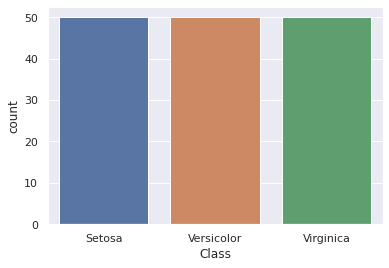

In [36]:
sns.countplot(x='Class', data = dataset)

In [ ]:
#This further visualizes that species are well balanced
# Each species ( Iris virginica, setosa, versicolor) has 50 as it’s count


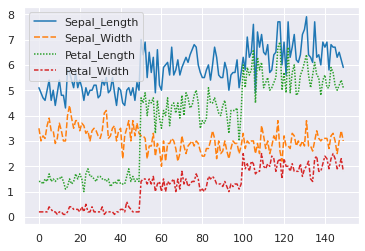

In [41]:
sns.lineplot(data=dataset, palette="tab10", linewidth=1.5)

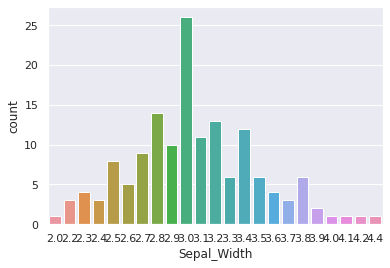

In [86]:
sns.countplot(x='Sepal_Width', data=dataset)

#Task 6: Train, Test and Split 



In [90]:
from sklearn.preprocessing import StandardScaler



In [91]:
scaler = StandardScaler()


In [92]:
scaler.fit(dataset.drop('Class',axis=1))


StandardScaler()

In [93]:
scaled_features = scaler.transform(dataset.drop('Class', axis = 1))


In [94]:
scaled_features


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [95]:
dataset_feat = pd.DataFrame(scaled_features, columns=dataset.columns[:-1])
dataset_feat.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [97]:
from sklearn.model_selection import train_test_split


In [98]:
X_train, X_test, y_train, y_test = train_test_split(dataset_feat, dataset['Class'], test_size = 0.25)


#Task 7 : Conduct logistic regression 

---



In [99]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [100]:
le = preprocessing.LabelEncoder()
le.fit(dataset['Class'])

LabelEncoder()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(dataset_feat, dataset['Class'], test_size = 0.25, random_state = 0)


In [102]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [103]:
predictions = logmodel.predict(X_test)


In [104]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [105]:
confusion_matrix(y_test, predictions)


array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(dataset_feat, dataset['Class'], test_size = 0.30, random_state = 0)


In [107]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [109]:
predictions = logmodel.predict(X_test)


In [110]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [111]:
confusion_matrix(y_test, predictions)


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

#Task 8: KNN Analysis 

In [112]:
from sklearn.neighbors import KNeighborsClassifier


In [113]:
knn = KNeighborsClassifier(n_neighbors=1)


In [114]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [115]:
pred = knn.predict(X_test)


In [116]:
from sklearn.metrics import classification_report, confusion_matrix


In [117]:
print(confusion_matrix(y_test, pred))


[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


In [118]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [119]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.36 %
Standard Deviation: 7.45 %


In [126]:
error_rate = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

In [127]:
error_rate

[0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.08888888888888889,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667]

Text(0, 0.5, 'Error Rate')

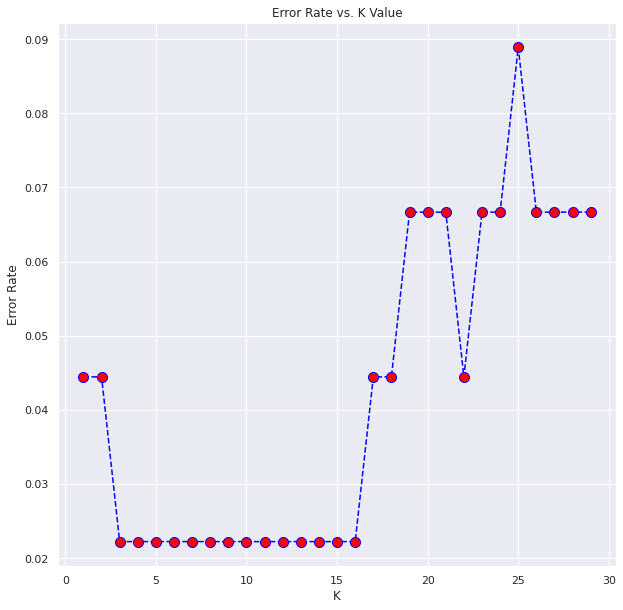

In [130]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title ('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [131]:
knn3 = KNeighborsClassifier(n_neighbors=3)


In [132]:
knn3.fit(X_train, y_train)
pred = knn3.predict(X_test)

In [133]:
print('With K = 2')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

With K = 2
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [134]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.27 %
Standard Deviation: 8.92 %


In [135]:
knn5 = KNeighborsClassifier(n_neighbors = 5)


In [136]:
knn5.fit(X_train, y_train)
pred = knn5.predict(X_test)

In [137]:
print('With K = 4')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

With K = 4
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [138]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn5, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.27 %
Standard Deviation: 4.57 %


#Conduct SVM Model

In [139]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)
from sklearn.svm import SVC


In [148]:
classifier = SVC(kernel = 'linear', random_state = 0)


In [149]:
classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [150]:
y_pred = classifier.predict(X_test)


In [151]:
from sklearn.metrics import confusion_matrix


In [152]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21  0  0]
 [ 0 29  1]
 [ 0  1 23]]


In [153]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.14 %
Standard Deviation: 5.71 %
